# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
df = pd.read_csv('hotel_bookings 2.csv')

# Exploratory Data Analysis and Data Cleaning

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,3/7/2015


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
103812,City Hotel,0,3,2016,December,53,28,0,4,2,...,No Deposit,9.0,NaN,0.0,Transient,110.5,0.0,1.0,Check-Out,1/1/2017
103813,City Hotel,0,231,2016,December,53,27,0,5,2,...,No Deposit,79.0,NaN,0.0,Transient,64.6,0.0,0.0,Check-Out,1/1/2017
103814,City Hotel,0,11,2016,December,53,30,0,2,2,...,No Deposit,9.0,NaN,0.0,Transient,120.0,0.0,1.0,Check-Out,1/1/2017
103815,City Hotel,0,23,2016,December,53,30,0,2,2,...,No Deposit,9.0,NaN,0.0,Transient,148.0,0.0,2.0,Check-Out,1/1/2017
103816,City Hotel,0,52,2016,December,53,29,0,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(103817, 32)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103817 entries, 0 to 103816
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103817 non-null  object 
 1   is_canceled                     103817 non-null  int64  
 2   lead_time                       103817 non-null  int64  
 3   arrival_date_year               103817 non-null  int64  
 4   arrival_date_month              103817 non-null  object 
 5   arrival_date_week_number        103817 non-null  int64  
 6   arrival_date_day_of_month       103817 non-null  int64  
 7   stays_in_weekend_nights         103817 non-null  int64  
 8   stays_in_week_nights            103817 non-null  int64  
 9   adults                          103817 non-null  int64  
 10  children                        103812 non-null  float64
 11  babies                          103816 non-null  float64
 12  meal            

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [11]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,103817,103817,103816,103328,103816,103816,103816,103816,103816,103816,103816
unique,2,12,5,168,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,63757,11902,81016,46497,47015,84858,74692,63602,89068,77137,59607


In [12]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined' nan]
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV

In [13]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              5
babies                                1
meal                                  1
country                             489
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                             14925
company                           97644


In [14]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [49]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,month
count,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000,103323.000000
mean,0.427175,105.316716,2016.032277,28.350638,15.783814,0.939888,2.541157,1.855647,0.102581,0.008217,0.035220,0.100084,0.149125,0.210863,2.668428,99.558854,0.066791,0.531711,6.536396
std,0.494670,107.613152,0.674062,13.662894,8.775044,1.014508,1.959081,0.585534,0.396991,0.099748,0.184335,0.906575,1.589720,0.636742,18.859202,48.396014,0.253049,0.770485,3.435006
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.000000,4.000000
50%,0.000000,70.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.670000,0.000000,0.000000,7.000000
75%,1.000000,164.000000,2016.000000,40.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.400000,0.000000,1.000000,10.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,508.000000,8.000000,5.000000,12.000000


In [50]:
df.shape

(103323, 31)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
df = df[df['adr']<5000]

# Data Analysis and Visualizations

Percentage of cancelled: 0    57.282502
1    42.717498
Name: is_canceled, dtype: float64


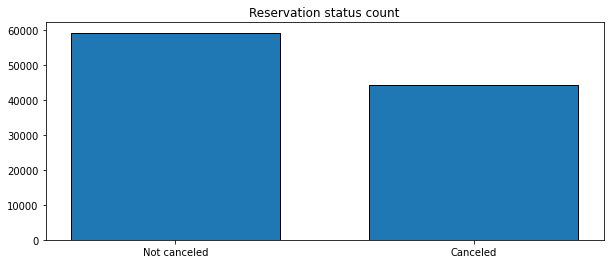

In [41]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print('Percentage of cancelled:', cancelled_perc*100)

plt.figure(figsize = (10,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

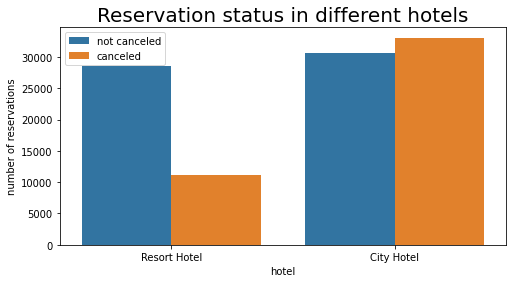

In [42]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'tab10')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()


In [20]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [21]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

1    0.518775
0    0.481225
Name: is_canceled, dtype: float64

In [22]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

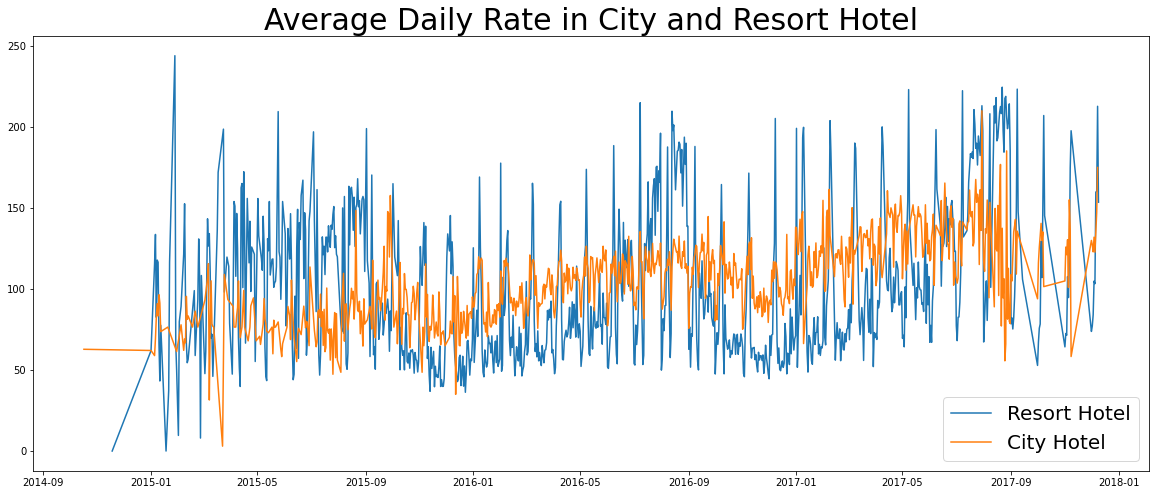

In [23]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

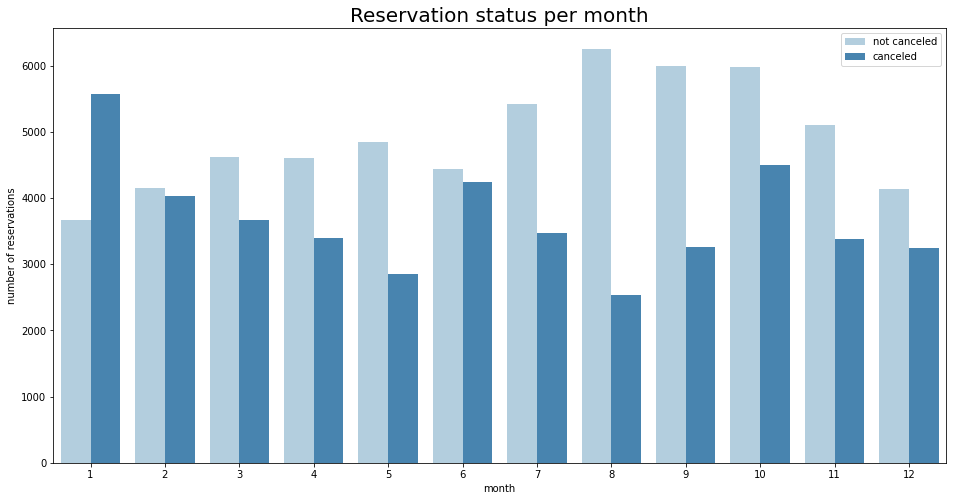

In [44]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

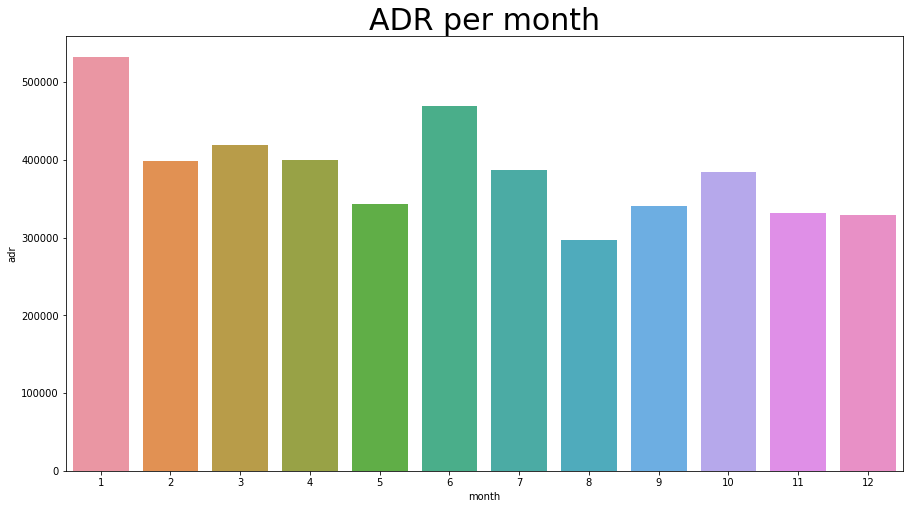

In [25]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot('month', 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

In [39]:
country_guests_night = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests_night.columns = ['country', 'stays_in_weekend_nights']

top_countries_guests = country_guests_night.head(10)




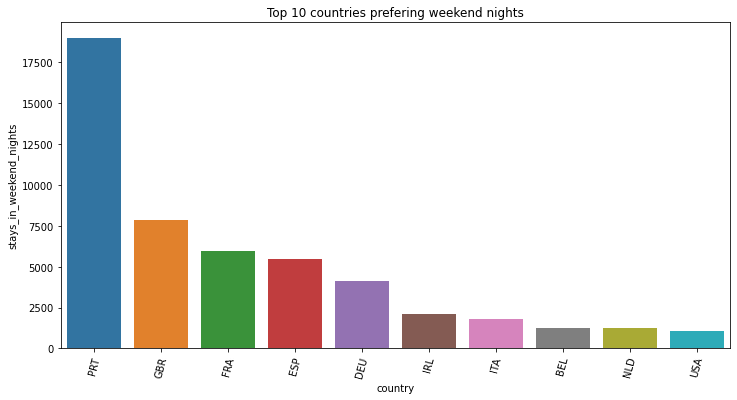

In [40]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries prefering weekend nights')
sns.barplot(x=top_countries_guests.country, y=top_countries_guests['stays_in_weekend_nights']);

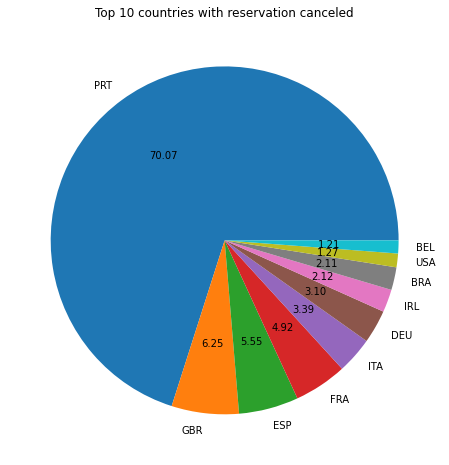

In [26]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [27]:
df['market_segment'].value_counts()

Online TA        46940
Offline TA/TO    21939
Groups           18342
Direct           10456
Corporate         4803
Complementary      667
Aviation           176
Name: market_segment, dtype: int64

In [28]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.454303
Offline TA/TO    0.212334
Groups           0.177521
Direct           0.101197
Corporate        0.046485
Complementary    0.006455
Aviation         0.001703
Name: market_segment, dtype: float64

In [29]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469833
Groups           0.274078
Offline TA/TO    0.187530
Direct           0.043410
Corporate        0.022022
Complementary    0.001994
Aviation         0.001133
Name: market_segment, dtype: float64

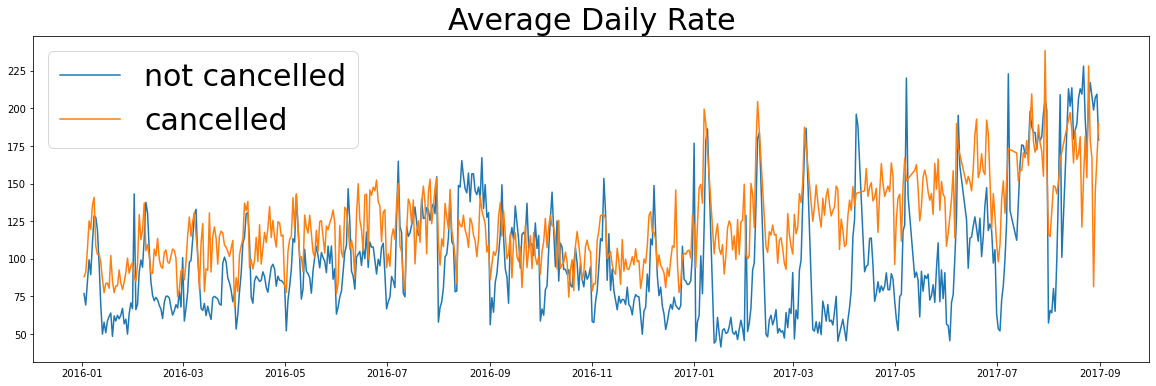

In [46]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 30)
plt.show()

In [33]:

%matplotlib inline